# Design and Development of a Web-Based Bank Customer Churn Prediction Platform Using Advanced Machine Learning Models to Enhance Customer  Retention Strategies and User Experience. 

* This is a classification problem in a binary form, where the target variable is centered on whether a customer churns (1) or not (0). The following machine learning algorithms are well-suitable for the task in view: 
* XGBoost (Extreme Gradient Boosting).
* LightGBM (LIght Gradient Boosting Machine).
* CatBoost (Categorical Boosting).
* Random Forest Classifiertrees.
* Neural Networks (MLP).
* These models will be trained and evaluated to determine the most effective approach for predicting customer churn and improving retention strategies.


This project aims to predict customer churn in banks, helping institutions identify at-risk customers and improve retention. By analyzing factors like credit scores, account balances, and customer activity, the model will provide insights to enhance loyalty strategies. Using Python and machine learning, the project will develop a predictive model based on historical customer data. 

Feature engineering, exploratory data analysis (EDA), and visualization techniques will reveal key churn patterns. Advanced models, including ensemble learning, will ensure high accuracy.

The final output will be a web-based platform where banks can input customer data, receive churn predictions, and access retention recommendations. With real-time insights, banks can improve customer experience, reduce attrition, and optimize retention strategies.

# NAME: OMIJIE OGBEIFUN PRECIOUS_D3742060. 
* SUPERVISOR: DR HUBBER ANNA. 
* SECOND READER: OPARA CHIDIMMA. 
* DATE: 02/05/2025


# Methodology for Analysis
* **The methodology for this analysis follows a structured approach to uncover key patterns and factors influencing customer attrition.**
* **Data Overview:**

    - Inspect dataset for missing values, duplicates, and inconsistencies.
    - Analyze distributions of key features like credit scores, account balances, and tenure.
    - Identify outliers and assess data quality.
    
* **Feature Categorization:**

    - Classify features into demographic (e.g., age, gender, country), financial (e.g., balance, estimated salary), and engagement-related (e.g., active member status, number of products used).
    
* **Formulate Hypotheses:**

    - Define the null hypothesis (H0): There is no significant relationship between customer demographics, financial behaviors, and churn.
    - Test hypotheses to determine the strongest churn predictors.

* **Statistical Analysis:**

    - Correlation Analysis to assess relationships between numerical variables like age, tenure, credit score, account balance, and churn probability.
    - Chi-square tests for categorical variables to evaluate their association with churn.
    
* **Visual Analysis:**

    - Use heatmaps, bar charts, and scatter plots to explore trends in customer churn.
    - Box plots and histograms to detect skewness and distribution of key numerical features.
    
* **Observations & Insights:**

    - Summarize key findings from statistical and visual analyses.
    - Identify the most influential features driving customer churn for model training.







# Steps for This Analysis

* Variable Description.
* Importing The Necessary Libraries.
* Loading The Dataset.
* Exploratory Data Analysis (EDA).
* Data Cleaning.
* Summary Statistics for Numerical Features.
* Detecting Outliers.
* Distribution of Numerical Features.
* Distribution of Categorical Features.
* Univariate Analysis.
* Multi Variate Analysis.
* Data Encoding Using Label Encoder.
* Feature Importance.
* Balancing The Dataset.
* Model Training.
* Visualisation of The Trained Model Performance.
* Final Recommendation.
* Confusion Matrix and AUC Curves.
* Saving The Best Model.


# Variable Description
customer_id – A unique numerical identifier assigned to each customer.

credit_score – A numerical value representing the creditworthiness of the customer. Higher scores indicate better credit history.

country – The country where the customer resides.

gender – The gender of the customer (e.g., Male or Female).

age – The age of the customer in years.

tenure – The number of years the customer has maintained an account with the bank.

balance – The total account balance of the customer in monetary units.

products_number – The number of financial products or services the customer uses within the bank.

credit_card – A binary variable indicating whether the customer owns a credit card (1 = Yes, 0 = No).

active_member – A binary variable representing whether the customer is an active member of the bank (1 = Yes, 0 = No).

estimated_salary – The estimated annual income of the customer.

churn – The target variable indicating whether the customer has churned (left the bank) or not (1 = Churned, 0 = Not Churned).

# Importing the necessary Libraries
* These libraries provide essential functions for data handling, preprocessing, visualization, model training, evaluation, and deployment during the Machine Learning analysis.

In [1]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# import dependencies
import pandas as pd
import numpy as np
from collections import Counter
import os

# For visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


# scikit-learn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.utils import resample
#from tensorflow.keras.models import load_model
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
!pip install lightgbm

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
#import optuna
import joblib
from sklearn.decomposition import PCA

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc  

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Checking the Programming Language Version.
import sys
print(sys.version)


3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


# Loading the Dataset into a pandas DataFrame for processing.
* This is important because machine learning models need structured data to train and make predictions. 

In [3]:
# Loading the dataset into the DataFrame
Bank_Customer_Churn_Prediction = pd.read_csv(r'C:\Users\d3742060\Downloads\Bank_Customer_Churn_Prediction.csv')
Bank_Customer_Churn_Prediction.head(10)



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
Bank_Customer_Churn_Prediction.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


* The above codes provides a quick preview of the dataset. This helps to verify if the dataset was loaded correctly.

In [5]:
# This code is to check the data shape to know the number of columns and rows on the dataframe.
Bank_Customer_Churn_Prediction.shape

(10000, 12)

* The above dataset contains 10,000 rows and 12 columns

 # Exploratory Data Analysis (EDA) 
 * EDA helps us to understand data structure, patterns, and distributions.

# Data Cleaning
* This helps us to handle missing values, duplicates, outliers, and inconsistent data in the dataframe.

In [6]:
# The below code is to remove the 'customer_id' column. The reason is that it does not contribute any meaningful insight to this analysis. 

Bank_Customer_Churn_Prediction = Bank_Customer_Churn_Prediction.drop(['customer_id'], axis=1)

Bank_Customer_Churn_Prediction.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


* The above dataFrame reveals that customer_id column has been deleted.

In [7]:
Bank_Customer_Churn_Prediction.shape

(10000, 11)

* The new data shape above reveals that we now have 11 features and 10000 rows.

In [8]:
# Checking the data info to enable us get additional information about the columns.
Bank_Customer_Churn_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
# Checking for missing data
Bank_Customer_Churn_Prediction.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

* The above printed result shows that there are no missing data.
* These could have been removed if the missing values were less than 5% and 
* replaced with the mean if more than 20% 

In [10]:
# Checking for duplicates
Bank_Customer_Churn_Prediction.duplicated().sum()

0

* The above result shows there are no duplicates

# Summary statistics for the numeric features

In [11]:
# Further statistical description of the dataset, giving the mean, std, min & max values for each column

Bank_Customer_Churn_Prediction.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* From the summary statistics above, we can conclude that all features look OK. We do not see any extreme values for any feature.

In [12]:
# Check data types and unique values to confirm there are no unusual data entries or types
Bank_Customer_Churn_Prediction.dtypes  ,   Bank_Customer_Churn_Prediction.nunique()

(credit_score          int64
 country              object
 gender               object
 age                   int64
 tenure                int64
 balance             float64
 products_number       int64
 credit_card           int64
 active_member         int64
 estimated_salary    float64
 churn                 int64
 dtype: object,
 credit_score         460
 country                3
 gender                 2
 age                   70
 tenure                11
 balance             6382
 products_number        4
 credit_card            2
 active_member          2
 estimated_salary    9999
 churn                  2
 dtype: int64)

* Giving the above data types and unique values, there are no anomalies found

# Univariate Analysis

* Detecting Outliers

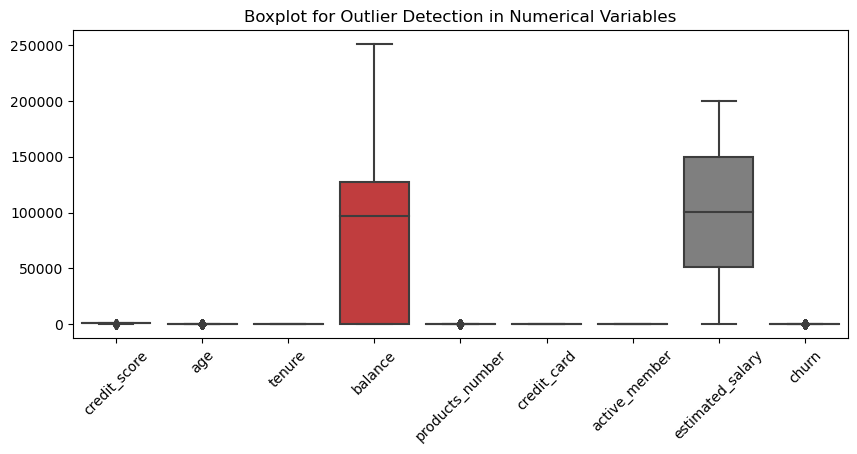

In [13]:
# Select only numerical columns
numerical_cols = Bank_Customer_Churn_Prediction.select_dtypes(include=['int64', 'float64']).columns
# Boxplot to identify outliers for all numerical variables
plt.figure(figsize=(10, 4)) 
sns.boxplot(data=Bank_Customer_Churn_Prediction[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection in Numerical Variables")
plt.show()

* In the above boxplot, outliers are present in the following numerical columns (Credit score, age and product number). These outliers need to be handles by using capping method to set extreme values to a reasonable maximum. This will make us not to loose data.

<Axes: xlabel='age'>

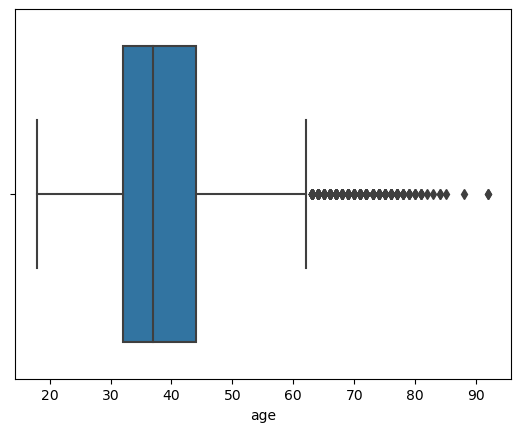

In [14]:
# boxplot to identify outliers
sns.boxplot(x=Bank_Customer_Churn_Prediction['age'])

<Axes: xlabel='products_number'>

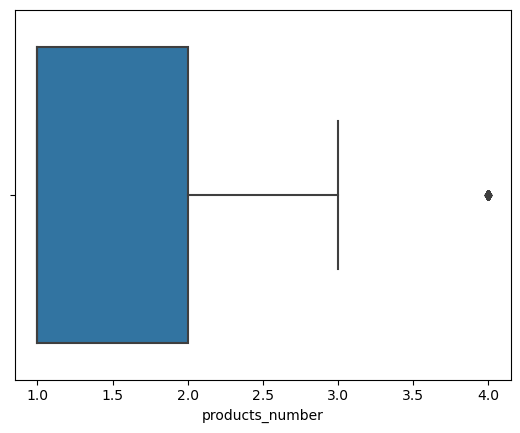

In [15]:
# boxplot to identify outliers
sns.boxplot(x=Bank_Customer_Churn_Prediction['products_number'])

<Axes: xlabel='credit_score'>

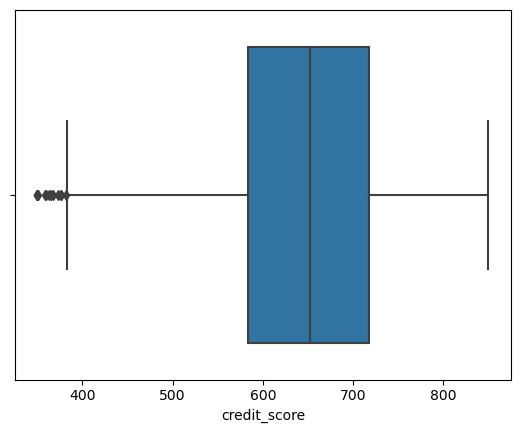

In [16]:
# boxplot to identify outliers
sns.boxplot(x=Bank_Customer_Churn_Prediction['credit_score'])

* Individual boxplot was used to visualize outliers in age, product number and Credit score for better understanding
* It was discovered that the outliers values are minimal hence, there was no need handling them.

# Distribution of numerical features

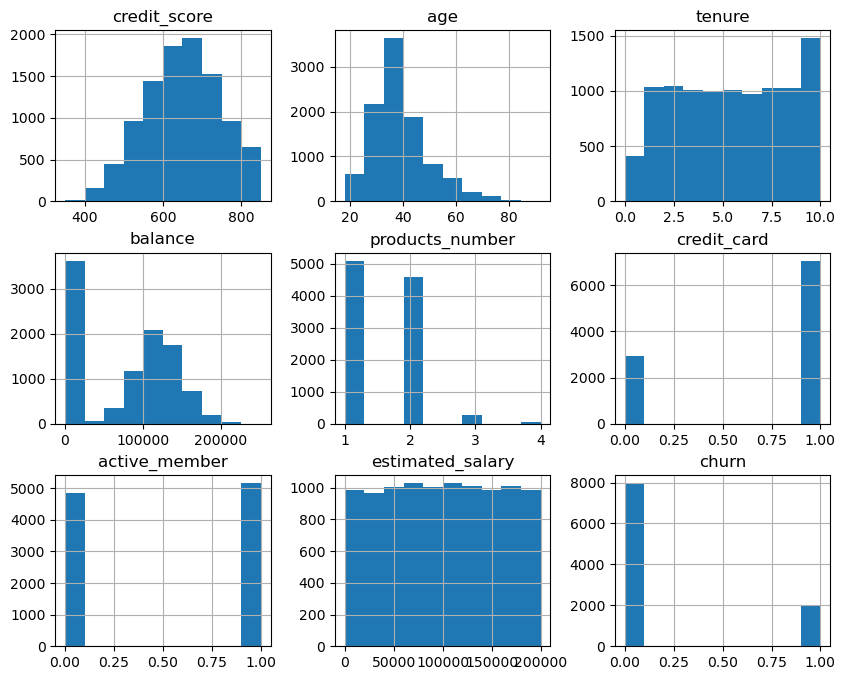

In [17]:
# Distribution of numerical features
# Plot histogram grid
Bank_Customer_Churn_Prediction.hist(figsize=(10,8))

plt.show()

# Histogram Findings For Numerical Features:

* Credit Score: Mostly normal around the values 600–700.

* Age: Skewed right, in which most customers are 30–40 years old; older customers may churn differently.

* Tenure: Evenly spread, but a spike at 10 years.

* Balance: Bimodal—many have zero balance, others cluster around 50K–150K. Zero balance might indicate inactivity.

* Products Number: Most have 1 or 2; few have 3+. Fewer products might mean higher churn.

* Active Member: Majority are active; inactivity might predict churn.

* Estimated Salary: Evenly spread, likely not a key churn factor.

* Churn: Imbalanced—most didn’t churn, but a significant minority did.

* Distributions of Categorical Features

In [18]:
# Summarize categorical features
Bank_Customer_Churn_Prediction.describe(include=['object'])

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


* The above result shows us the number of unique classes for each feature. For example, there are more males (5457) than females. And France is most common of 3 geographies in our dataframe. There are no sparse classes.

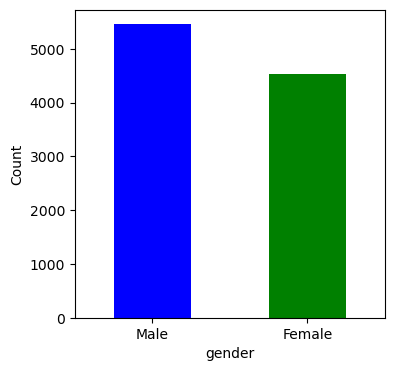

In our data sample there are more males than females.


Counter({'Female': 4543, 'Male': 5457})

In [19]:
# Bar plot for "gender"
plt.figure(figsize=(4,4))
Bank_Customer_Churn_Prediction['gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('gender')
plt.xticks(rotation=0)
plt.show()

print("In our data sample there are more males than females.")

Counter(Bank_Customer_Churn_Prediction.gender)

* This bar chart shows the gender distribution of customers

* Males outnumbered females, but not by a huge margin.

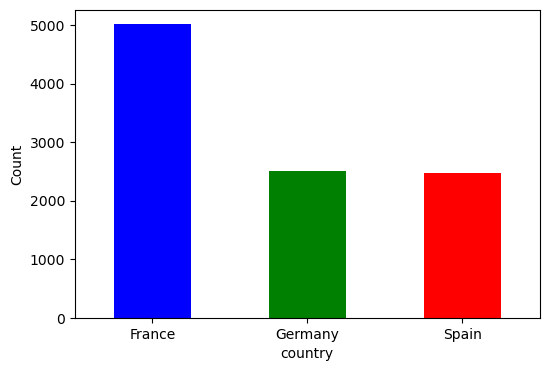

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [20]:
# Bar plot for "country"
plt.figure(figsize=(6,4))
Bank_Customer_Churn_Prediction['country'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('country')
plt.xticks(rotation=0)
plt.show()

Counter(Bank_Customer_Churn_Prediction.country)

* The above Bar plot Visual for Country indicates that France has the highest number of customers and may likely has the highest number of churners, followed by Germany and Spain.

In [21]:
# Given distribution
country_counts = Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})
total_entries = sum(country_counts.values())

# Calculate percentages rounded to 2 decimal places
country_percentages = {country: round((count / total_entries) * 100, 2) for country, count in country_counts.items()}

country_percentages

{'France': 50.14, 'Spain': 24.77, 'Germany': 25.09}

* Majority of customers are from France with percentage of about 50%, and others from Germany and Spain around 25% each.

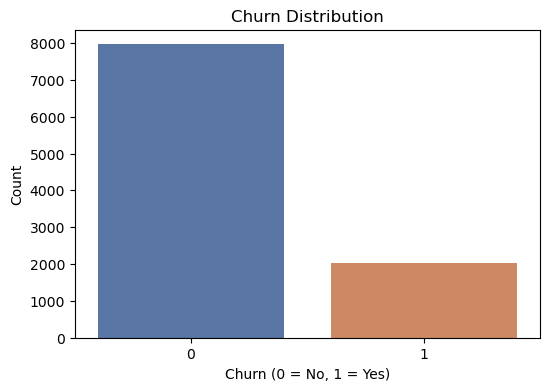

In [22]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=Bank_Customer_Churn_Prediction, palette="deep")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

* From the above, the distribution of the Target variable (Churn) is imbalanced

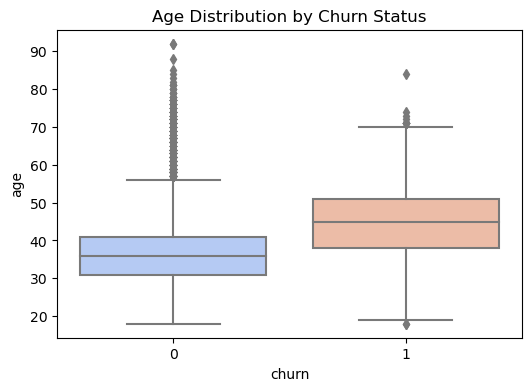

In [23]:
# Boxplot of age vs churn
plt.figure(figsize=(6, 4))
sns.boxplot(x="churn", y="age", data=Bank_Customer_Churn_Prediction, palette="coolwarm")
plt.title("Age Distribution by Churn Status")
plt.show()

* In the Box plot above, Churned customers tend to be older than non-churned customers, this is as shown by the higher median age and wider distribution. Non-churned customers have more outliers in older age groups, indicating some retention among older individuals. Non-Churned Customers (0) have a lower age range as shown by the Whiskers.

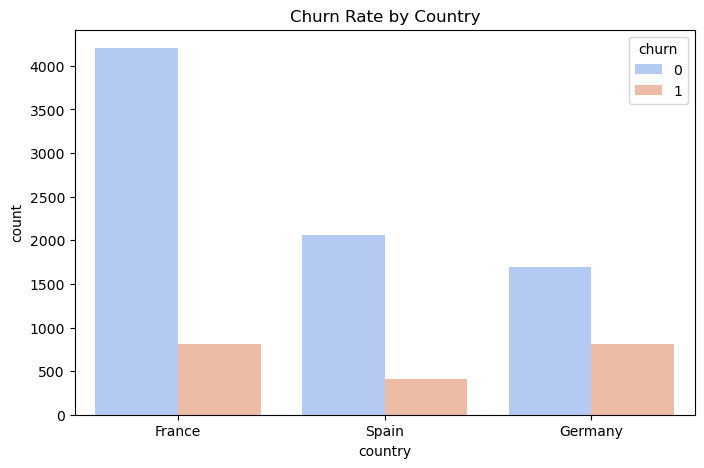

In [24]:
# Churn rate by country
plt.figure(figsize=(8,5))
sns.countplot(x="country", hue="churn", data=Bank_Customer_Churn_Prediction, palette="coolwarm")
plt.title("Churn Rate by Country")
plt.show()

* The above Countplot indicates that France has the highest number of customers, but also has the highest churn count. Germany has the lowest total count of customers but a relatively higher churn proportion. Spain has the lowest number of customers and churn count among the three countries.

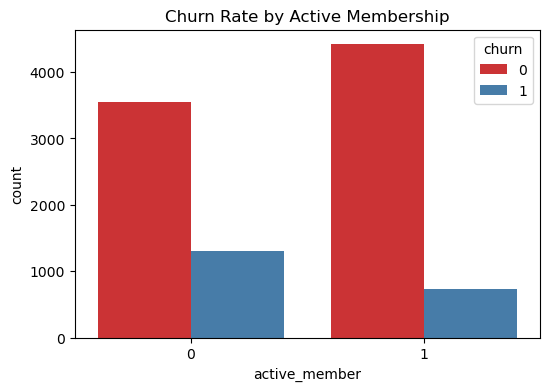

In [25]:
# Churn rate by active membership
plt.figure(figsize=(6,4))
sns.countplot(x="active_member", hue="churn", data=Bank_Customer_Churn_Prediction, palette="Set1")
plt.title("Churn Rate by Active Membership")
plt.show()

* The above visual shows that active members have a lower churn rate than inactive members, as shown by the smaller blue bar for active members. Inactive members experience higher churn, indicating that active membership may help reduce customer attrition.

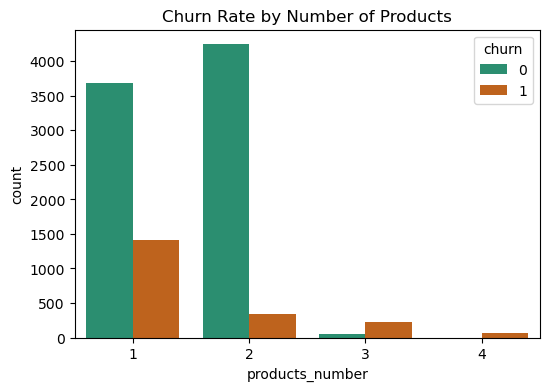

In [26]:
# Churn rate by number of products
plt.figure(figsize=(6,4))
sns.countplot(x="products_number", hue="churn", data=Bank_Customer_Churn_Prediction, palette="Dark2")
plt.title("Churn Rate by Number of Products")
plt.show()

* The visual above shows that Customers with only one product have the highest churn rate, while those with two products churned less. Very few customers have three or four products, but their churn rate is still notable.

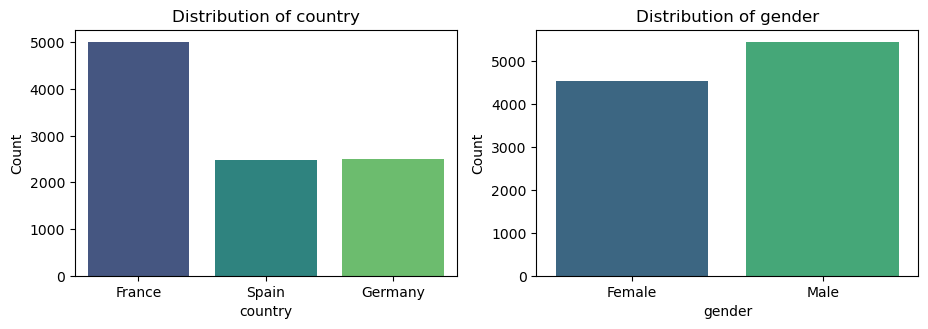

In [27]:
# Selecting categorical columns to show distribution of categorical features 
# To understand class imbalanc and feature importance

categorical_cols = ['country', 'gender']

# Plot count plots for each categorical variable
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Arrange in a 2x3 grid
    sns.countplot(x=Bank_Customer_Churn_Prediction[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

* For Country distribution, France has the largest customers base, this may cause the model to favour french customers in terms of prediction. This is why resampling is very important to handles the imbalanced dataset.
* In the gender distribution visual, it shows that the bank have more male customers compare to female.


In [28]:
# Univariate Analysis
# Skewness & Kurtosis
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for col in numerical_cols:
    skewness = Bank_Customer_Churn_Prediction[col].skew()
    kurtosis = Bank_Customer_Churn_Prediction[col].kurt()
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

credit_score: Skewness = -0.07, Kurtosis = -0.43
age: Skewness = 1.01, Kurtosis = 1.40
tenure: Skewness = 0.01, Kurtosis = -1.17
balance: Skewness = -0.14, Kurtosis = -1.49
products_number: Skewness = 0.75, Kurtosis = 0.58
estimated_salary: Skewness = 0.00, Kurtosis = -1.18


* The skewness and kurtosis values above indicate the distribution of numerical features. Age (1.01 skewness, 1.40 kurtosis) is right-skewed, meaning there are more younger customers. Products_number (0.75 skewness, 0.58 kurtosis) is slightly right-skewed, indicating most customers have fewer products. Balance (-0.14 skewness, -1.49 kurtosis) and Credit_score (-0.07 skewness, -0.43 kurtosis) are approximately normal. Tenure (0.01 skewness, -1.17 kurtosis) and Estimated_salary (0.00 skewness, -1.18 kurtosis) are nearly symmetric, suggesting a uniform spread of values.


# Multivariate Analysis

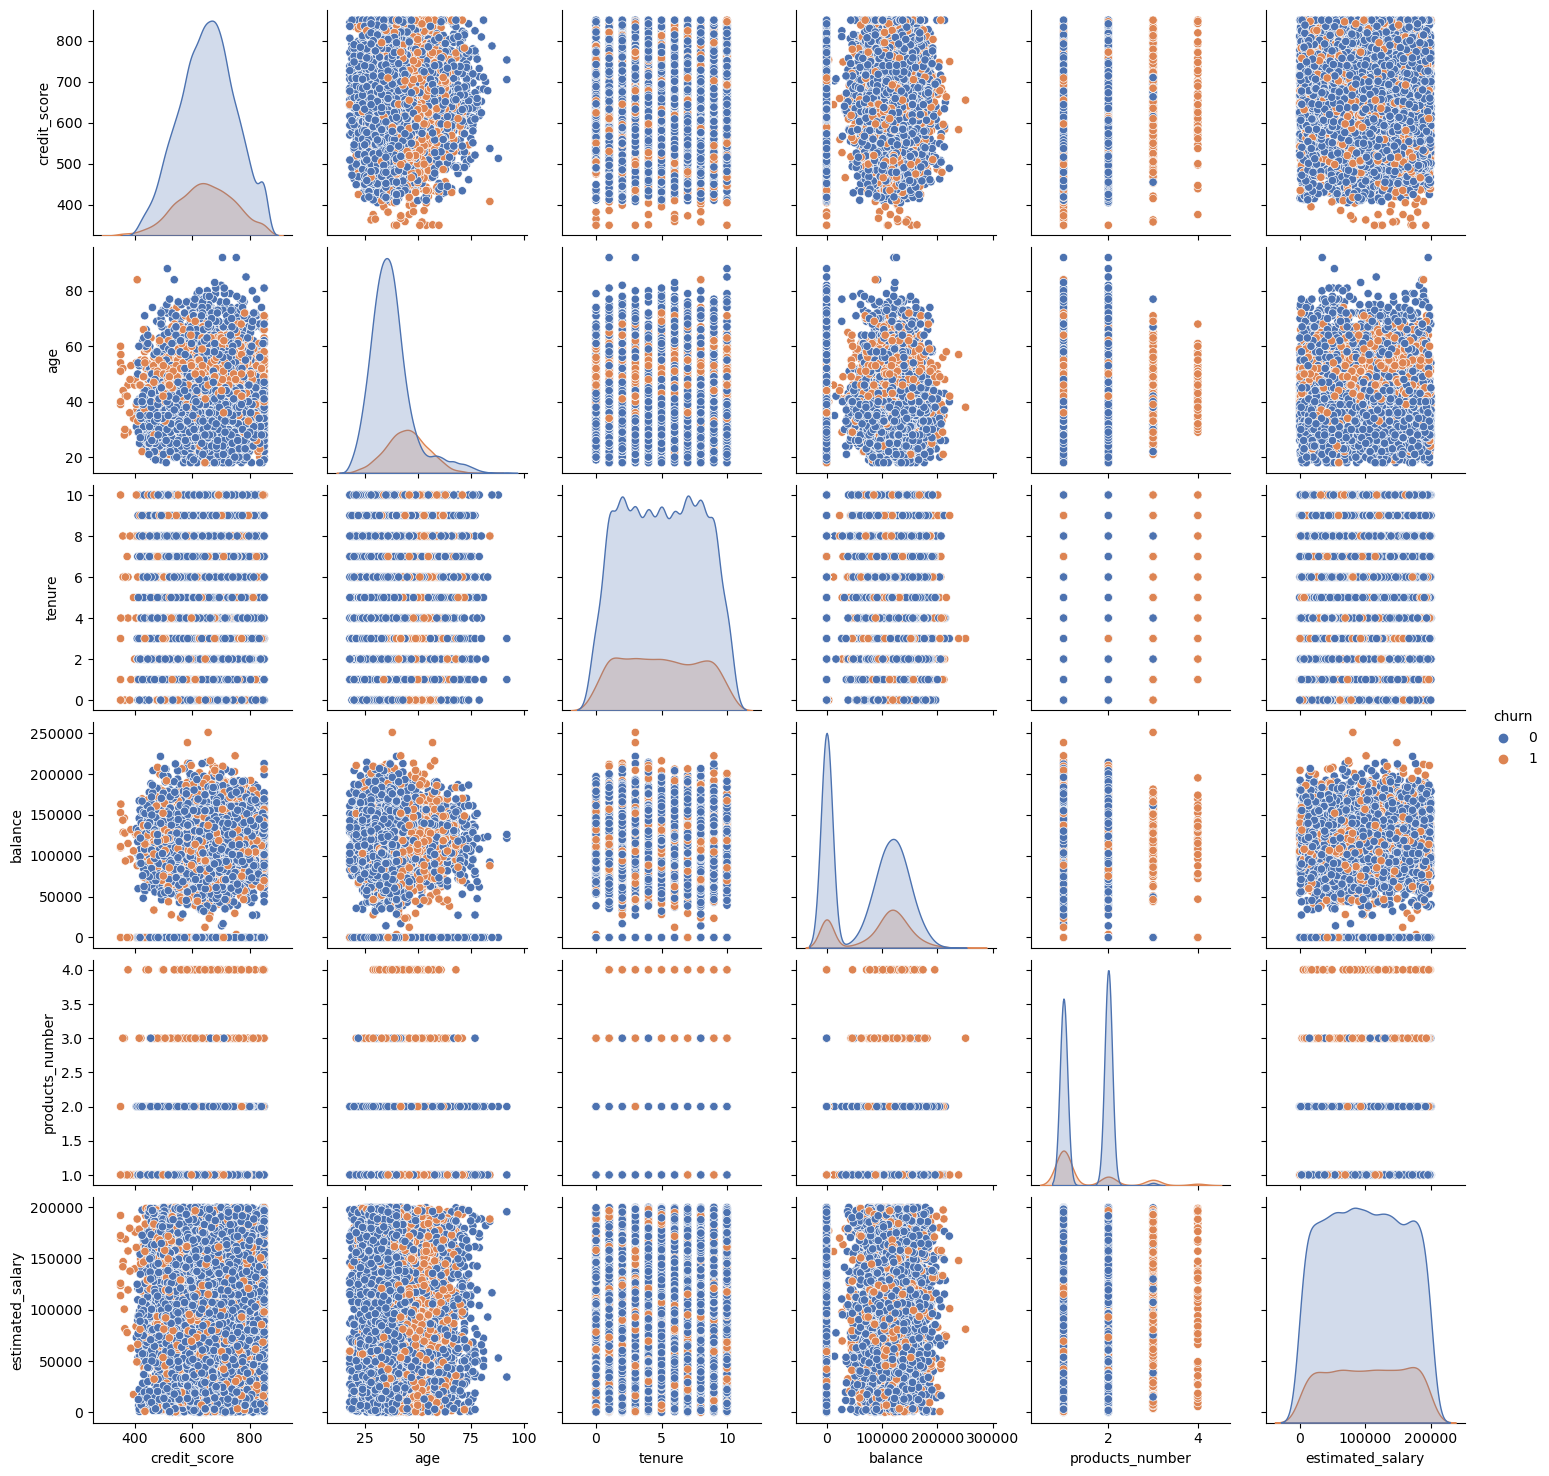

In [29]:
# Multivariate Analysis
# Pairplot (Numerical Variables & Churn)
sns.pairplot(Bank_Customer_Churn_Prediction, hue="churn", vars=numerical_cols, palette="deep")
plt.show()

* This pairplot above visualizes relationships between features and churn (0 = stayed, 1 = left) color-coded. Key insights:

* Credit Score & Churn: No clear trend, churn is spread across scores.

* Age & Churn: Higher churn among older customers.

* Tenure & Churn: Churn rate is evenly spread.

* Balance & Churn: Churners seem to cluster in the mid-to-high balance range.

* Products Number & Churn: More churn in customers with 2+ products.

* Estimated Salary & Churn: No strong correlation with churn.

# Scatter Plot

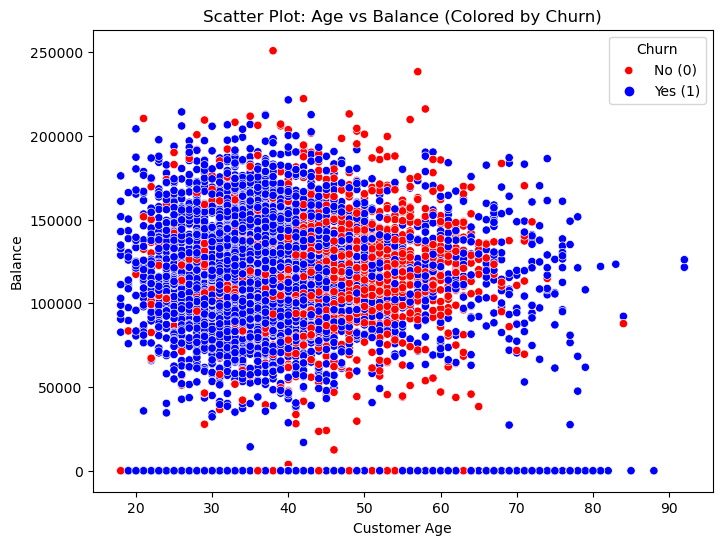

In [30]:
# Scatter plot to check relationship between Age and Balance, colored by Churn
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='balance', hue='churn', data=Bank_Customer_Churn_Prediction, palette=['blue', 'red'])

# Labels and Title
plt.xlabel("Customer Age")
plt.ylabel("Balance")
plt.title("Scatter Plot: Age vs Balance (Colored by Churn)")
plt.legend(title="Churn", labels=["No (0)", "Yes (1)"])

plt.show()


* In the scatter plot above, we can get the following insights: 

* Higher churn (red) in customers aged 40–60 with mid-to-high balances.

* Younger customers (<30) rarely churn, even with low balances.

* Churn is less common among elderly customers (70+).

* Many customers with zero balance did not churn (blue), possibly inactive but not exiting.

# Correlation Analysis for Testing the Hypothesis. 

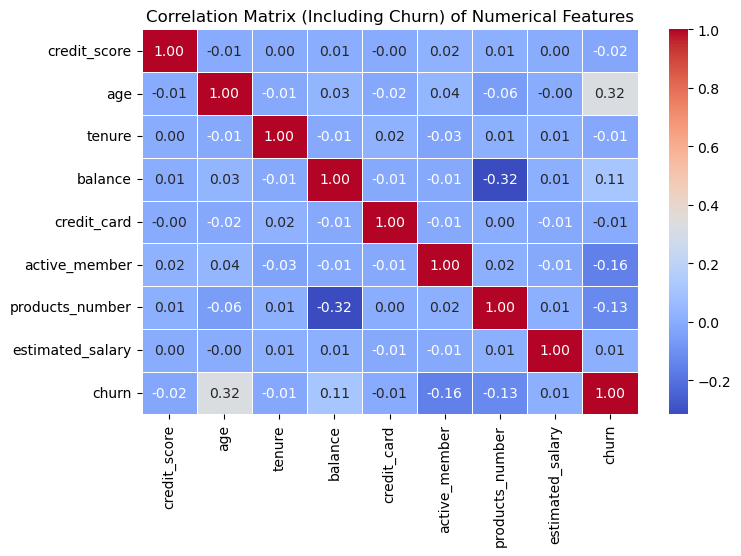

In [31]:
# Select numerical columns
numeric_cols = ['credit_score', 'age', 'tenure', 'balance','credit_card','active_member', 'products_number', 
                'estimated_salary','churn']

# Compute correlation matrix
corr_matrix = Bank_Customer_Churn_Prediction[numeric_cols].corr(method='spearman')


# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Including Churn) of Numerical Features" )
plt.show()


* The above results shows a slight Positive correlation between age and active_member (0.04), the older customers might be slightly more likely to remain active members. This might mean that age is not a strong predictor of active membership.
* The negative correlation between balance and products_number (-0.32), shows that customers with higher balances tend to have fewer products. This might indicate that customers with large deposits do not diversify their banking products.
* Age has the highest correlation of (0.32) with churn which means age is a strong predictor.



In [32]:
Bank_Customer_Churn_Prediction.corr(numeric_only=True)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# "Cramér’s V" for Testing the hypotheses. 

In [33]:
# Categorical Feature Relationships (Cramér’s V)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

print("\nCramér’s V for Country & Churn:", cramers_v(Bank_Customer_Churn_Prediction["country"], Bank_Customer_Churn_Prediction["churn"]))
print("Cramér’s V for Gender & Churn:", cramers_v(Bank_Customer_Churn_Prediction["gender"], Bank_Customer_Churn_Prediction["churn"]))
print("Cramér’s V for Credit Card & Churn:", cramers_v(Bank_Customer_Churn_Prediction["credit_card"], Bank_Customer_Churn_Prediction["churn"]))


Cramér’s V for Country & Churn: 0.17356708697916934
Cramér’s V for Gender & Churn: 0.10626315006669113
Cramér’s V for Credit Card & Churn: 0.006865404569611379


* "Cramér’s V" is a statistical measure that quantifies the strength of association between two categorical variables. It is based on chi-square statistic, It ranges from 0 to 1 (0 means no association and 1 means perfect association.
* Source: https://www.statstest.com/cramers-v-2/

* Cramér’s V values indicate the strength of association between categorical variables and churn:

* Country & Churn (0.1735)** → Weak but strongest influence among these three. Country might slightly impact churn.

* Gender & Churn (0.1063)** → Very weak correlation; gender is not a strong churn predictor.

* Credit Card & Churn (0.0069)** → Almost no correlation; credit card ownership doesn’t impact churn.

* Above 0.3 could have been Strong association.

In [34]:
# Segment "churn" by gender and display the frequency within each class
grouped = Bank_Customer_Churn_Prediction.groupby('gender')['churn'].agg(Count='value_counts')
grouped

Count
gender churn       
Female 0       3404
       1       1139
Male   0       4559
       1        898

* The table above shows churn pattern among gender, more female churned compare to male and more male stayed compare to female.

In [35]:
# Calculate percentage within each class
dfgp = grouped.groupby(level=[0], group_keys=False).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgp


Percentage
gender churn            
Female 0           74.93
       1           25.07
Male   0           83.54
       1           16.46

* From the above table, 25% of female churned compared to their male counterparts (16%) while 83.5% of male stayed compare to female (74.9%).

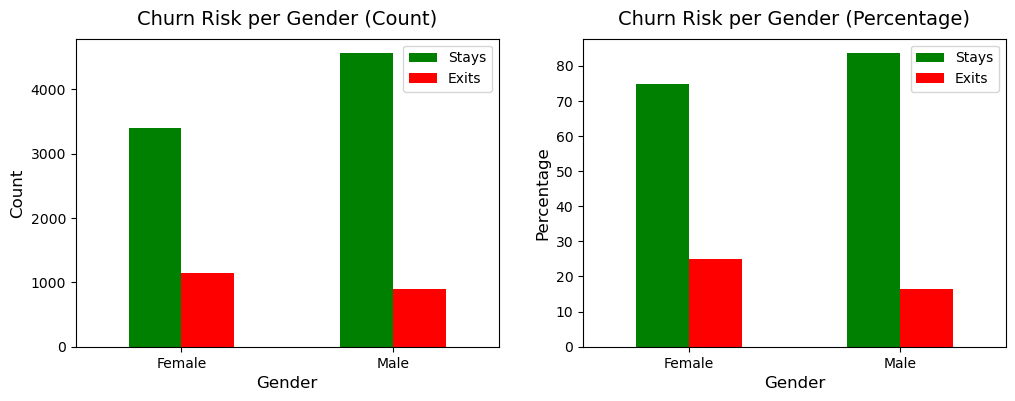

In [36]:
# Compute churn count by gender
dfgc = Bank_Customer_Churn_Prediction.groupby('gender')['churn'].value_counts().unstack()

# Compute churn percentage by gender
dfgp = dfgc.div(dfgc.sum(axis=1), axis=0) * 100  # Normalize to get percentage

# Define labels
labels = ['Stays', 'Exits']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Churn Count Plot
dfgc.plot(kind='bar', color=['g', 'r'], rot=0, ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count', size=12)
ax1.set_xlabel('Gender', size=12)

# Churn Percentage Plot
dfgp.plot(kind='bar', color=['g', 'r'], rot=0, ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage', size=12)
ax2.set_xlabel('Gender', size=12)

# Show plot
plt.show()


* These charts above compare churn rates between males and females:

* Therer are more males than females customers overall, but female customers churn at a higher rate (25% vs. 15%).

* Males are more likely to stay (higher retention percentage).

# Data Encoding Using Label Encoder

In [37]:
# Use Label Encoder

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
Bank_Customer_Churn_Prediction = pd.read_csv(r'C:\Users\d3742060\Downloads\Bank_Customer_Churn_Prediction.csv')

# Drop 'customer_id' as it has no predictive value
Bank_Customer_Churn_Prediction.drop(['customer_id'], axis=1, inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['country', 'gender']

# Apply Label Encoding to each column
for col in categorical_cols:
    Bank_Customer_Churn_Prediction[col] = label_encoder.fit_transform(Bank_Customer_Churn_Prediction[col])


In [39]:
print(Bank_Customer_Churn_Prediction.head())

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0  


* The above dataframes shows that categorical variables have been encoded into numerical values in preparation for modelling, using LabelEncoder. 




# Feature Importance

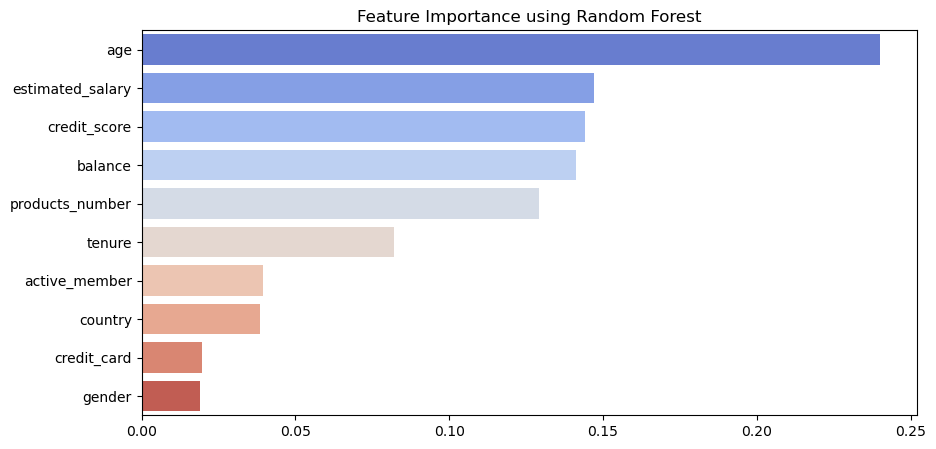

In [40]:
# Feature Importance using Random Forest
X = Bank_Customer_Churn_Prediction.drop(columns=["churn"])  
y = Bank_Customer_Churn_Prediction["churn"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Variance Threshold (Removing low variance features)
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=0.01)  
# X_train_var = selector.fit_transform(X_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance using Random Forest")
plt.show()

## **Feature Importance (Using Random Forest)**

* Age is the most important factor in predicting churn. Older customers might be at higher risk.

* Estimated Salary, Credit Score, and Balance are also strong predictors.

* Products number & Tenure have moderate influence.

* Being an Active Member, Country, and Gender have lower impact.

* Credit Card ownership has minimal effect, confirming previous findings.

# Balancing the Dataset
**The dataset was balanced using Bootstrap Resampling**

In [41]:
# Balance the dataset using oversampling
X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]
X_minority_resampled, y_minority_resampled = resample(X_minority, y_minority, replace=True, 
                                                       n_samples=len(X_train[y_train == 0]), random_state=42)
X_train_resampled = np.vstack((X_train[y_train == 0], X_minority_resampled))
y_train_resampled = np.hstack((y_train[y_train == 0], y_minority_resampled))

# Converting back to DataFrame for saving
balanced_Bank_Customer_Churn_Prediction = pd.DataFrame(X_train_resampled, columns=X.columns)
balanced_Bank_Customer_Churn_Prediction["churn"] = y_train_resampled
balanced_Bank_Customer_Churn_Prediction.to_csv("balanced_dataset.csv", index=False)

In [42]:
#import os
# To check the file path balanced data
print(os.getcwd())  # Shows the current working directory


C:\Users\d3742060\OneDrive - Teesside University\MASTER'S PROJECT\Final_ML_Application


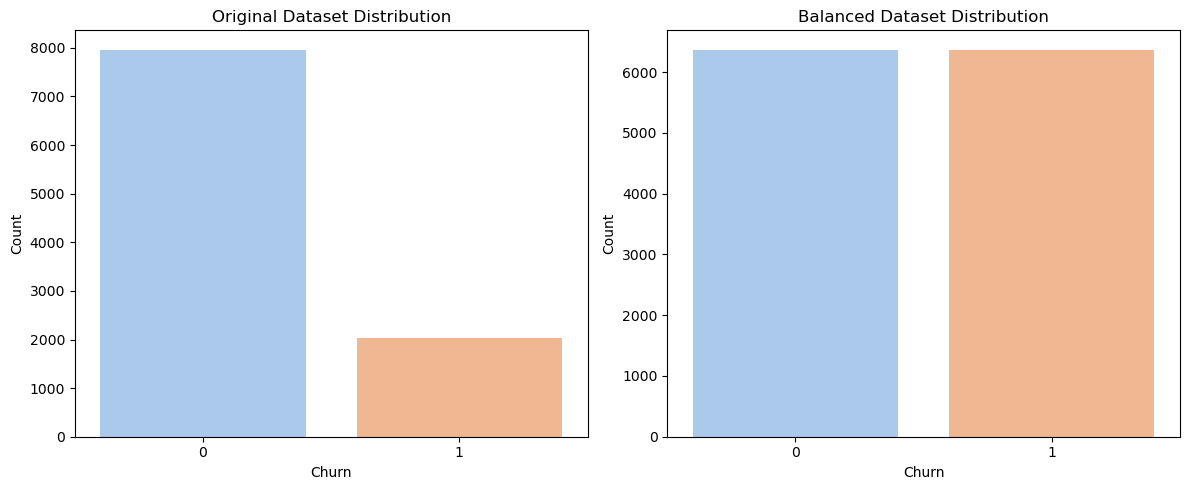

In [44]:
# Load the original dataset
Bank_Customer_Churn_Prediction_original =  pd.read_csv(r'C:\Users\d3742060\Downloads\Bank_Customer_Churn_Prediction.csv')

# Load the balanced dataset
balanced_Bank_Customer_Churn_Prediction = pd.read_csv(r'C:\Users\d3742060\Downloads\balanced_dataset.csv')

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original dataset distribution
sns.countplot(x='churn', data=Bank_Customer_Churn_Prediction_original, palette="pastel", ax=axes[0])
axes[0].set_title("Original Dataset Distribution")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# Balanced dataset distribution
sns.countplot(x='churn', data=balanced_Bank_Customer_Churn_Prediction, palette="pastel", ax=axes[1])
axes[1].set_title("Balanced Dataset Distribution")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

* From the above visuals, the one on the left shows that the distribution of the Target variable (Churn) is imbalanced.
* The visual on the right shows where the Target variable distribution was balanced using Bootsrap resampling method.
* According to KDNuggets (2023), bootstrapping is a resampling technique that helps in estimating the uncertainty of a statistical model. It includes sampling the original dataset with replacement and generating multiple new datasets of the same size as the original.


**Reference:**
* KDNuggets (2023) Bootstrapping: An essential technique in statistics and machine learning. Available at: https://www.kdnuggets.com/2023/03/bootstrapping.html (Accessed: 9 March 2025).


**NOTE**
* We resample in machine learning to address issues like imbalanced datasets and improve model performance. When one class in the data has significantly fewer examples than another, resampling techniques like oversampling (duplicating minority class instances) or under sampling (reducing majority class instances) can help create a more balanced dataset, preventing models from being biased towards the majority or minority class.






# Model Training

* Feature scaling was not only applied on Neural Network because of the nature of algorithms used in this analysis, (XGBoost, LightGBM, CatBoost, Random Forest) do not require feature scaling because they are tree-based models that split data based on conditions and not distances.


In [45]:
from sklearn.preprocessing import StandardScaler

# Scale features for MLPClassifier only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Define models
models = {
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), 
                                    activation='relu', 
                                    solver='adam',
                                    alpha=0.001,  # L2 Regularization
                                    max_iter=500, 
                                    random_state=42)
}

# Define evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

# Train on Imbalanced Dataset
imbalanced_results = {name: evaluate_model(model, X_train_scaled if name == "Neural Network" else X_train, 
                                           y_train, 
                                           X_test_scaled if name == "Neural Network" else X_test, 
                                           y_test) 
                      for name, model in models.items()}

# Train on Balanced Dataset
balanced_results = {name: evaluate_model(model, 
                                         X_train_resampled_scaled if name == "Neural Network" else X_train_resampled, 
                                         y_train_resampled, 
                                         X_test_scaled if name == "Neural Network" else X_test, 
                                         y_test) 
                    for name, model in models.items()}

# Hyperparameter tuning for MLP & other models
param_grids = {
    "XGBoost": {"learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "LightGBM": {"num_leaves": [31, 50], "learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "CatBoost": {"depth": [4, 6], "learning_rate": [0.01, 0.1], "iterations": [100, 200]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10]},
    "Neural Network": {
        "hidden_layer_sizes": [(64, 32), (128, 64)], 
        "activation": ["relu", "tanh"], 
        "solver": ["adam", "lbfgs"],
        "alpha": [0.0001, 0.001],  # Regularization
        "max_iter": [500, 1000]
    }
}

optimized_models = {}
for name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[name], param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_resampled_scaled if name == "Neural Network" else X_train_resampled, y_train_resampled)
    optimized_models[name] = grid_search.best_estimator_

# Evaluate Optimized Models
optimized_results = {name: evaluate_model(model, 
                                          X_train_resampled_scaled if name == "Neural Network" else X_train_resampled, 
                                          y_train_resampled, 
                                          X_test_scaled if name == "Neural Network" else X_test, 
                                          y_test) 
                     for name, model in optimized_models.items()}


[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 10
[LightGBM] [Info] [binary

In [46]:
# Convert Results to DataFrame
imbalanced_df = pd.DataFrame.from_dict(imbalanced_results, orient='index')
balanced_df = pd.DataFrame.from_dict(balanced_results, orient='index')
optimized_df = pd.DataFrame.from_dict(optimized_results, orient='index')

print("Imbalanced Dataset Results:")
print(imbalanced_df)
print("\nBalanced Dataset Results:")
print(balanced_df)
print("\nOptimized Model Results:")
print(optimized_df)

Imbalanced Dataset Results:
                Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost           0.8480   0.683274  0.471744  0.558140  0.707938
LightGBM          0.8585   0.736641  0.474201  0.576981  0.715443
CatBoost          0.8680   0.801688  0.466830  0.590062  0.718663
Random Forest     0.8640   0.782427  0.459459  0.578947  0.713408
Neural Network    0.8285   0.594118  0.496314  0.540830  0.704843

Balanced Dataset Results:
                Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost           0.8225   0.557018  0.624079  0.588644  0.748637
LightGBM          0.8140   0.533333  0.687961  0.600858  0.767081
CatBoost          0.8200   0.546720  0.675676  0.604396  0.766275
Random Forest     0.8545   0.690789  0.515971  0.590717  0.728481
Neural Network    0.7030   0.382685  0.749386  0.506645  0.720267

Optimized Model Results:
                Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost           0.8245   0.556680  0.675676  0.610433  0.76

** The code above took care of the followings:**
* Performs feature scaling on Neural Network Algorithm only. 
* It initializes all the algorithms used for this analysis.
* Enlisted the performance metrics used.
* Trained the models on imbalanced dateset.
* Trained the models on balanced dataset.
* Hyperparameter tuning for all models to optimize the result for better performance.
* Evaluated the trained models.

# visualising the Trained Model Performance

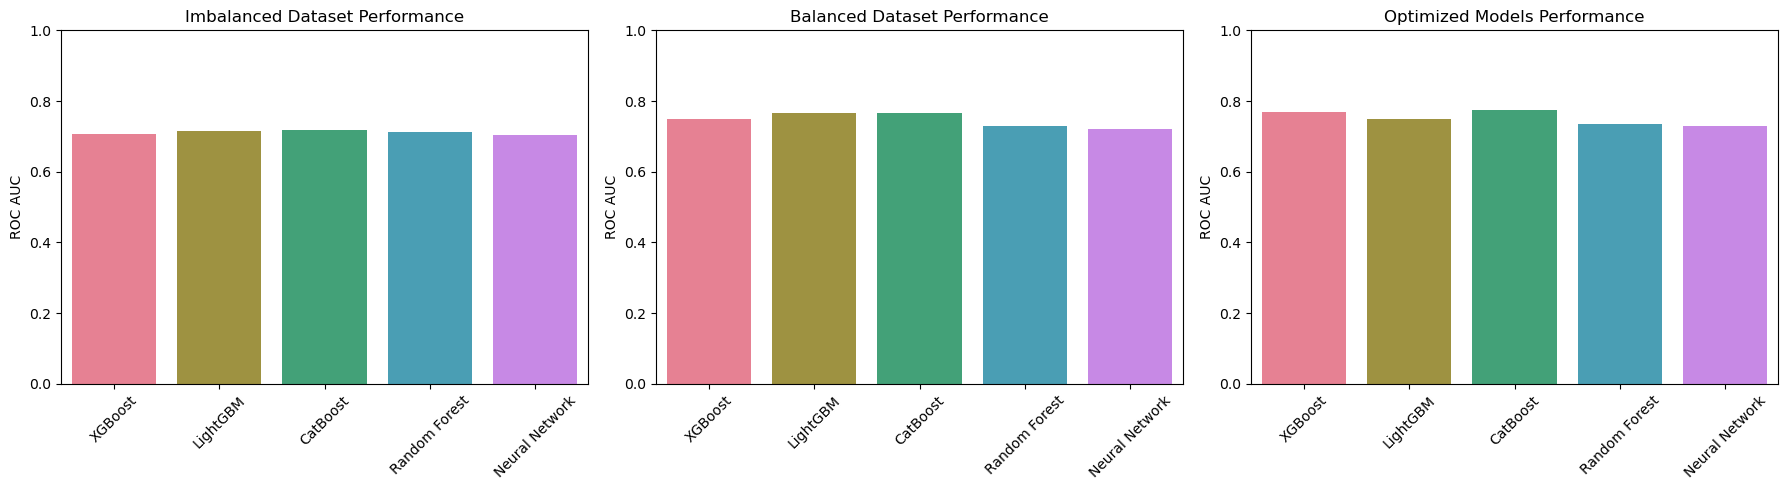

In [47]:
# Define Colors for Models
colors = sns.color_palette("husl", len(models))

# Visualize Model Performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, df, title in zip(axes, [imbalanced_df, balanced_df, optimized_df], 
                         ["Imbalanced Dataset", "Balanced Dataset", "Optimized Models"]):
    sns.barplot(x=df.index, y=df["ROC AUC"], ax=ax, palette=colors)
    ax.set_title(title + " Performance")
    ax.set_xticklabels(df.index, rotation=45)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## **Final Recommendation: Using the Optimized Models**

Since customer churn prediction is often more concerned with minimizing false negatives (recall) to prevent revenue loss, the optimized models are the best fit for this analysis.

This improves the model’s ability to detect actual churners while maintaining a reasonable level of precision. 
This enhances better customer retention strategies by allowing banks to proactively engage at-risk customers. 

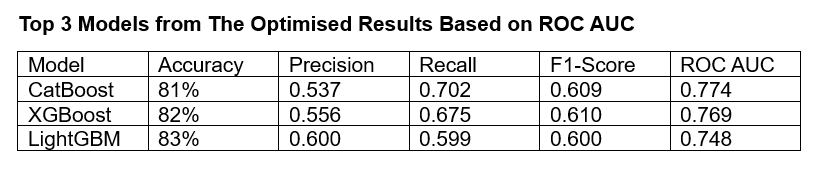




**Final Decision:**

**CatBoost is the best model for deployment**

* It has the highest recall (0.702), which means it detects the most churners during model training and optimization.

* It has the best ROC AUC (0.774), meaning it is the strongest at distinguishing between churners and non-churners.

* Its F1 score (0.609), is a stroge one, ensuring a good balance of precision and recall.

* CatBoost actually did not perform badly in terms of accuracy which is 81%.

**Why Not XGBoost or LightGBM?**

* XGBoost performed well in terms of accuracy (82%) but has a lower recall (0.675) and ROC AUC (0.769) than CatBoost.

* LightGBM has higher accuracy (83%) but a lower recall (0.599), meaning it misses more actual churners. it also has the lowest ROC AUC (0.748)

**NOTE**
* Accuracy is not the only metric to determine model performers as there are other performance metrics such as (Recall, F1-Score and ROC AUC).

**To get the top 3 models based on overall performance, the models are ranked based on important metric such as ROC AUC, as it is a strong indicator of model performance in classification tasks.**

In [48]:
# Convert optimized_results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(optimized_results, orient="index")

# Rank models based on ROC AUC Score (descending order)
top_models = results_df.sort_values(by="ROC AUC", ascending=False).head(3)

# Display Top 3 Models
print("Top 3 Best Models Based on Performance:")
print(top_models)



Top 3 Best Models Based on Performance:
          Accuracy  Precision    Recall  F1 Score   ROC AUC
CatBoost    0.8165   0.537594  0.702703  0.609159  0.774139
XGBoost     0.8245   0.556680  0.675676  0.610433  0.769100
LightGBM    0.8375   0.600985  0.599509  0.600246  0.748907


* The above shows Top 3 Best model based on optimized balanced Dataset which was used for the above final recommendation.

## **Confusion Matrix and AUC curve**

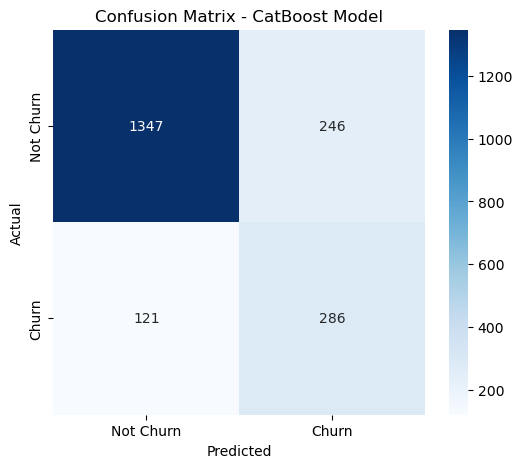

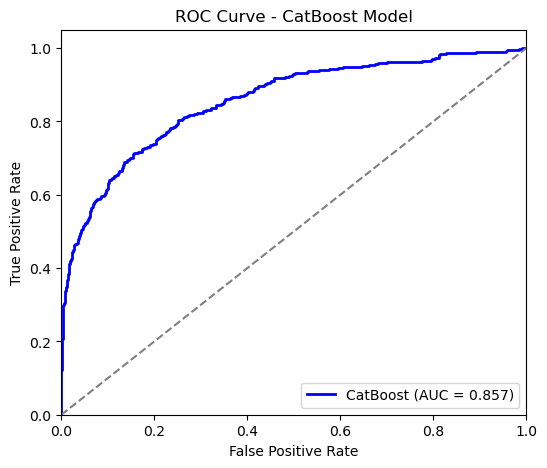

In [49]:
# Train the best model (CatBoost)
best_model = CatBoostClassifier(verbose=0, depth=6, learning_rate=0.1, iterations=200)
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Model")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'CatBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost Model')
plt.legend(loc="lower right")
plt.show()


* The CatBoost model's confusion matrix shows 1,347 True Negatives, 286 True Positives, 246 False Positives, and 121 False Negatives, indicating a strong ability to predict customer churn.
* Accuracy = TP+TN/TP+TN+FP+FN = 286 + 1347 / 286 + 1347 + 246 + 121 = 1633 / 2000 = 0.8165, Approximately 81%.
* This means the CatBoost model correctly predicted 82% of the cases.
* Recall = TP/TP+FN = 286 / 286 + 121 = 286 / 407 = 0.7027, Approximately 70%
* A higher recall means that the model is able to catch more actual churners.



** The ROC curve for the CatBoost model demonstrates strong classification performance, with an AUC of 0.857, indicating its effectiveness in distinguishing between churn and non-churn customers.**

 # Saving the best Model

In [50]:
# Save the trained model to a file uing joblib

joblib.dump(best_model, "catboost_best_model.pkl")

['catboost_best_model.pkl']

** Summary**
* The saved model will be recalled using joblib.load().
* It will be integrated into a web app where users can input customer data.
* The model will predict churn risk and return the result to users.
* This ensures that machine learning predictions are available in real-time for decision-making.


** Streamlit cloud will be used for Model Deployment.**